<a href="https://colab.research.google.com/github/elikaaghaei/Rahnema_college/blob/main/Rahnema_Intro_TensorFlow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import part**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.19.0


## Create Noisy Dataset

In [ ]:
def make_noisy_data(m=0.1, b=0.3 ,n=100):
  x= tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape = (len(x), ), stddev=0.01)
  y =m *x+b +noise
  return x,y

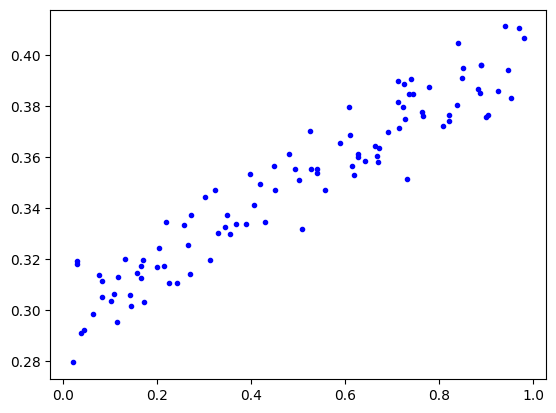

In [ ]:
x_train, y_train = make_noisy_data()

plt.plot(x_train, y_train, 'b.')

### Define variables of the model

In [ ]:
m = tf.Variable(0.)
b = tf.Variable(0.)

### Predict y given x

In [ ]:
def predict(x):
  y = m*x + b
  return y

### Loss Function

In [ ]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

## Calculate loss before training

In [ ]:
loss = squared_error(predict(x_train),y_train)
print(loss.numpy())

0.12351723


## Use Gradient Descent

In [ ]:
learning_rate = 0.05
steps = 200
for i in range(steps):
  with tf.GradientTape() as tape: #with tf.GradientTape(watch_accessed_variables = False) as tape:
    predictions = predict (x_train) #tape.watch([m,b])
    loss = squared_error(predictions, y_train)
  gradients = tape.gradient(loss,[m,b])

  m.assign_sub(gradients[0]*learning_rate)
  b.assign_sub(gradients[1]*learning_rate)

  if i%20 ==0:
    print("Step{0}: Loss{1}".format(i,loss))

Step0: Loss0.1235172301530838
Step20: Loss0.0007556086056865752
Step40: Loss0.00017726006626617163
Step60: Loss0.00015615714073646814
Step80: Loss0.0001418407482560724
Step100: Loss0.00013083964586257935
Step120: Loss0.00012237936607562006
Step140: Loss0.0001158730810857378
Step160: Loss0.00011086955055361614
Step180: Loss0.00010702158033382148


## Final Learnrd Values of m & b

In [ ]:
print("Best Parameters Values: m= %f and b=%f" %(m.numpy(), b.numpy()))

Best Parameters Values: m= 0.116940 and b=0.291648


### Plot Best Line

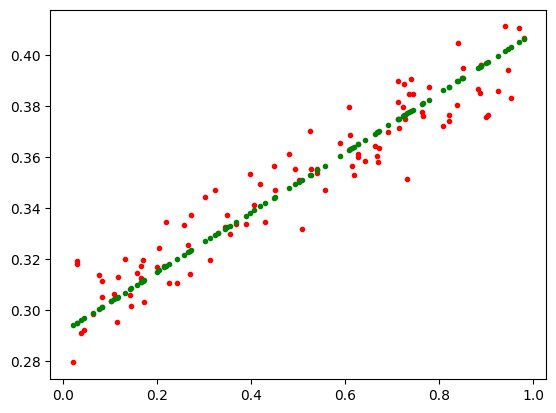

In [ ]:
plt.plot(x_train, y_train , 'r.')
plt.plot(x_train, predict(x_train), 'g.')